In [1]:
from google.colab import files

# Upload file
uploaded = files.upload()

# This will open a dialog box for file upload.
# After uploading, the


Saving tea_leaf_data_december_assam_500.csv to tea_leaf_data_december_assam_500.csv


In [2]:
import pandas as pd
import numpy as np

# Step 1: Load and preprocess data
# Load the CSV file
data = pd.read_csv('tea_leaf_data_december_assam_500.csv')


In [3]:
print(data)

     Leaf ID  Moisture (%)  Temperature (°C)  Humidity (%)
0          1          39.6              18.9          68.1
1          2          40.0              10.7          63.8
2          3          38.4              10.8          60.3
3          4          37.8              20.8          76.6
4          5          36.6              22.3          78.3
..       ...           ...               ...           ...
495      496          49.0              17.8          69.0
496      497          54.6              21.8          61.9
497      498          40.9              14.7          69.9
498      499          50.0              24.7          67.5
499      500          54.6              24.2          69.8

[500 rows x 4 columns]


In [4]:
data.describe()

,Leaf ID,Moisture (%),Temperature (°C),Humidity (%)
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,44.763200,17.918400,69.988400
std,144.481833,5.673396,4.268614,5.795861
min,1.000000,35.000000,10.000000,60.000000
25%,125.750000,40.075000,14.375000,65.375000
50%,250.500000,44.450000,18.300000,70.000000
75%,375.250000,49.800000,21.600000,74.625000
max,500.000000,55.000000,25.000000,79.900000


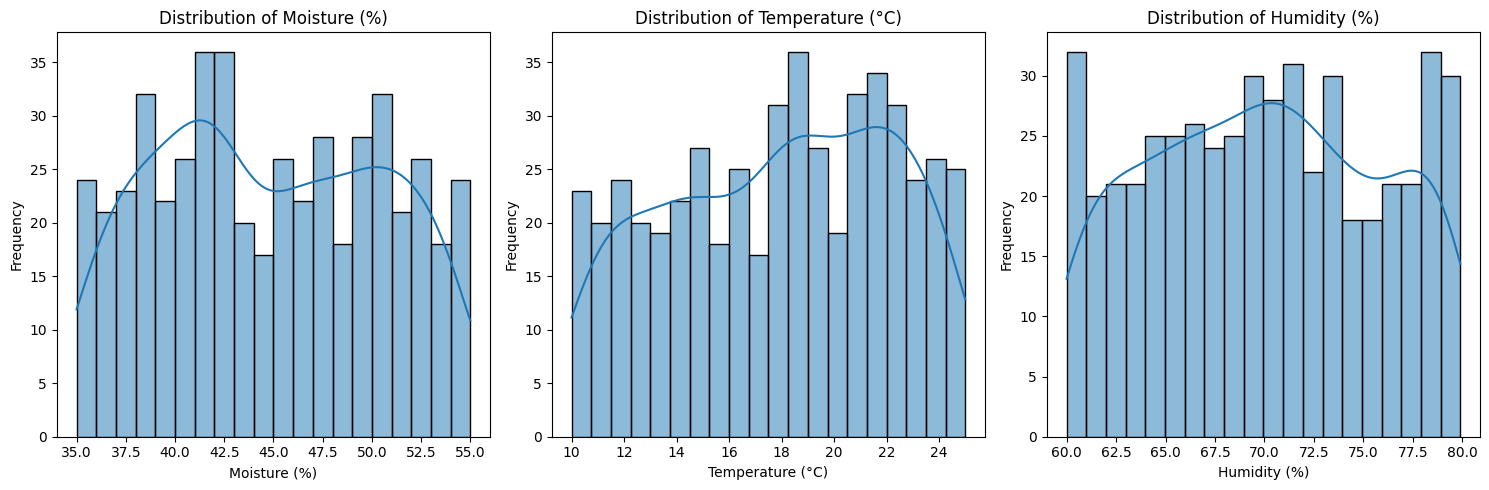

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

for i, column in enumerate(['Moisture (%)', 'Temperature (°C)', 'Humidity (%)']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


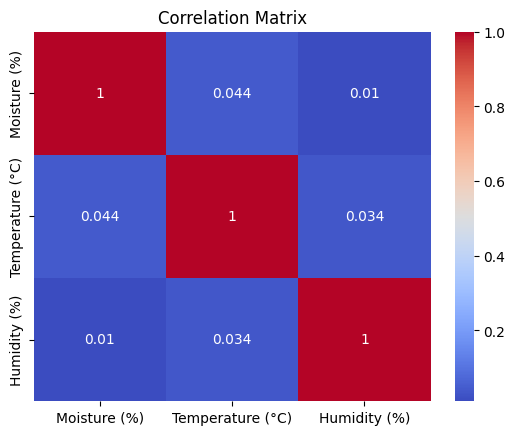

In [6]:
correlation_matrix = data[['Moisture (%)', 'Temperature (°C)', 'Humidity (%)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


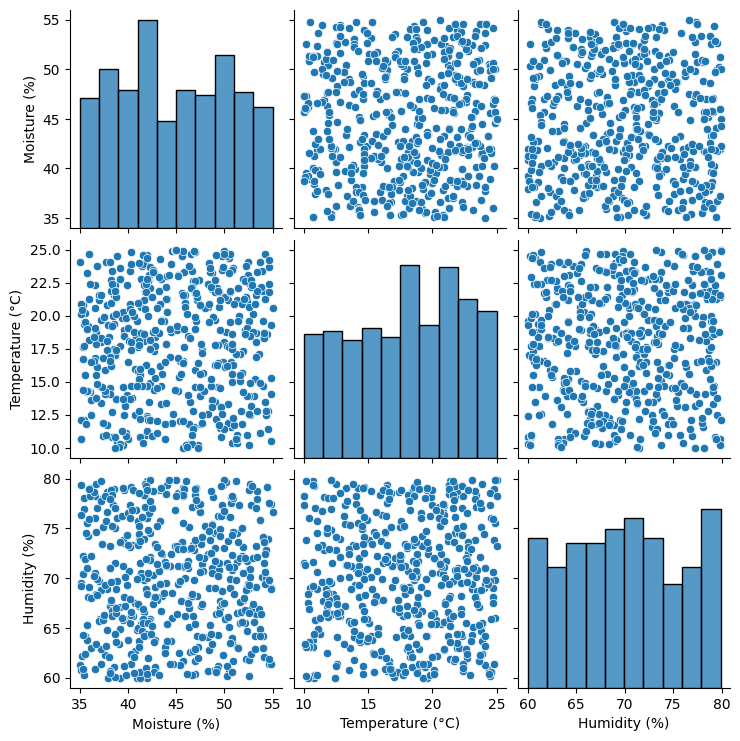

In [7]:
sns.pairplot(data[['Moisture (%)', 'Temperature (°C)', 'Humidity (%)']])
plt.show()


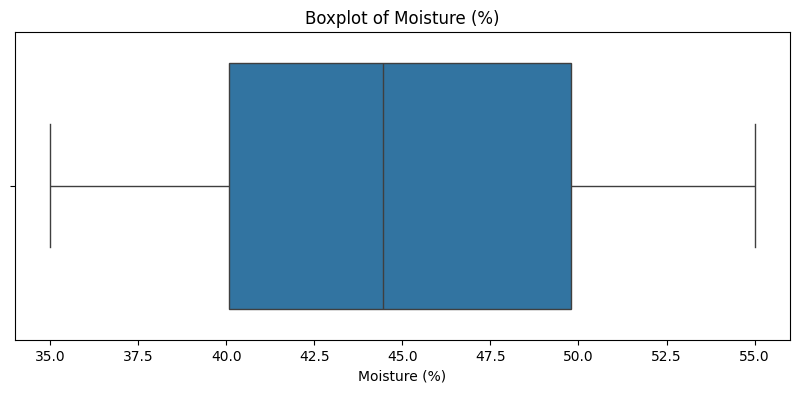

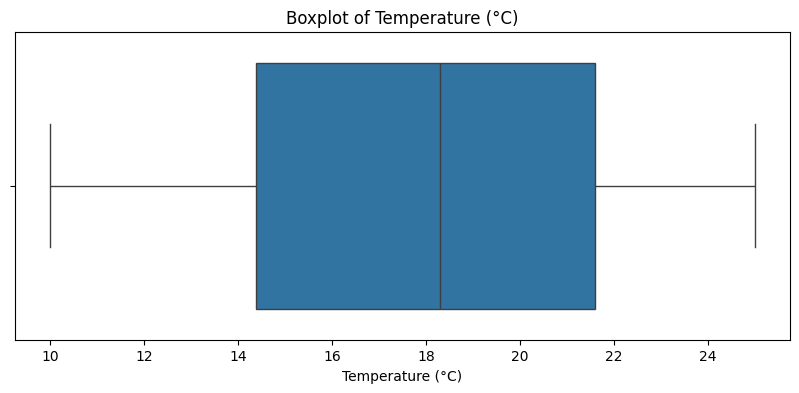

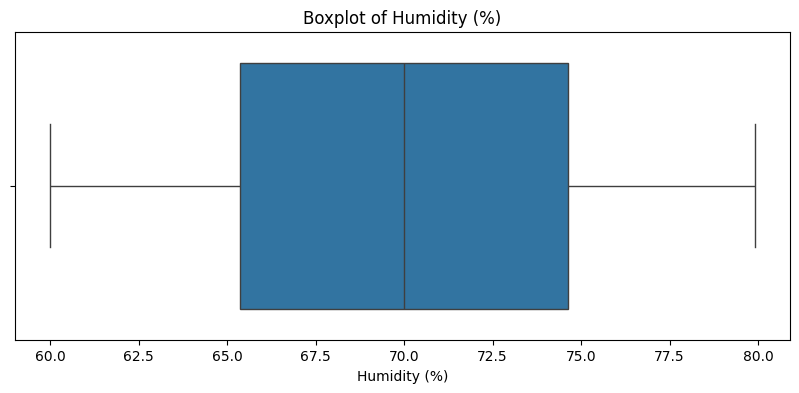

In [8]:
for column in ['Moisture (%)', 'Temperature (°C)', 'Humidity (%)']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [9]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Simulate quality labels based on thresholds
conditions = [
    (data['Moisture (%)'] > 45) & (data['Temperature (°C)'].between(18, 22)) & (data['Humidity (%)'].between(65, 75)),
    (data['Moisture (%)'] <= 45)
]
labels = np.select(conditions, [2, 1], default=0)  # High: 2, Medium: 1, Low: 0
data['Quality'] = labels

# Split features and target
X = data[['Moisture (%)', 'Temperature (°C)', 'Humidity (%)']].values
y = data['Quality'].values

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode labels for multi-class classification
y_categorical = to_categorical(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Step 2: Define the model
model = Sequential([
    Dense(16, input_dim=3, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Low, Medium, High
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

# Step 4: Evaluate and save the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the model
model.save('tea_leaf_quality_model.h5')


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6282 - loss: 1.0504 - val_accuracy: 0.5750 - val_loss: 1.0264
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6487 - loss: 1.0196 - val_accuracy: 0.6375 - val_loss: 0.9944
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6573 - loss: 0.9906 - val_accuracy: 0.6625 - val_loss: 0.9595
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7023 - loss: 0.9565 - val_accuracy: 0.6875 - val_loss: 0.9217
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7658 - loss: 0.9113 - val_accuracy: 0.7625 - val_loss: 0.8764
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.8883 - val_accuracy: 0.7625 - val_loss: 0.8239
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8254 - loss: 0.8345 - val_accuracy: 0.7875 - val_loss: 0.7636
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8086 - loss: 0.7974 - val_accuracy: 0.7750 - val_loss: 0.7058

Test Accuracy: 0.85


In [10]:
import pickle
from tensorflow.keras.models import load_model

# Step 1: Save the trained scaler and model together in a .pkl file
model_file = 'tea_leaf_quality_model.h5'
scaler_file = 'scaler.pkl'

# Save scaler and model in a dictionary
with open('model_and_scaler.pkl', 'wb') as f:
    pickle.dump({
        'scaler': scaler,
        'model': model_file
    }, f)

print("Model and scaler have been saved as model_and_scaler.pkl")


Model and scaler have been saved as model_and_scaler.pkl
